# Get Data

In [ ]:
import pandas as pd
from statistics import mean
import numpy as np

In [ ]:
df = pd.read_csv('dataset_3_labels_merged.csv', sep=';')
df

,commit number,commit ID,author name,committer name,message,URL,message_preprocessed,Decision,Rationale,Supporting Facts
0,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,mm: reduce noise in show_mem for lowmem alloca...,yes,yes,no
1,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,While discussing early DMA pool pre-allocation...,no,yes,yes
2,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,Those zones are usually not\npopulated on all...,no,no,yes
3,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,This is an attempt to reduce the ballast that ...,yes,yes,no
4,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,Please note that\nI have only compile tested ...,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...
2229,402,MDY6Q29tbWl0MjMyNTI5ODo3OWJlZmQwYzA4YzQ3NjZmOG...,Andrea Arcangeli,Linus Torvalds,[PATCH] oom-killer disable for iscsi/lvm2/mult...,https://api.github.com/repos/torvalds/linux/gi...,(akpm: we still need to document oom_adj and f...,yes,no,no
2230,403,MDY6Q29tbWl0MjMyNTI5ODoxZGExNzdlNGMzZjQxNTI0ZT...,Linus Torvalds,Linus Torvalds,Linux-2.6.12-rc2\n\nInitial git repository bui...,https://api.github.com/repos/torvalds/linux/gi...,Initial git repository build,yes,yes,no
2231,403,MDY6Q29tbWl0MjMyNTI5ODoxZGExNzdlNGMzZjQxNTI0ZT...,Linus Torvalds,Linus Torvalds,Linux-2.6.12-rc2\n\nInitial git repository bui...,https://api.github.com/repos/torvalds/linux/gi...,"I'm not bothering with the full history,\neven...",yes,no,no
2232,403,MDY6Q29tbWl0MjMyNTI5ODoxZGExNzdlNGMzZjQxNTI0ZT...,Linus Torvalds,Linus Torvalds,Linux-2.6.12-rc2\n\nInitial git repository bui...,https://api.github.com/repos/torvalds/linux/gi...,"We can create a separate ""historical"" git\narc...",yes,yes,no


In [ ]:
decision_sentences = list( df.loc[ (df['Decision'] == 'yes')  ]['message_preprocessed'])
rationale_sentences = list( df.loc[ (df['Rationale'] == 'yes')  ]['message_preprocessed'])
facts_sentences =  list( df.loc[ ( df['Supporting Facts'] == 'yes') ]['message_preprocessed'])
len(decision_sentences), len(rationale_sentences), len(facts_sentences)

(1343, 1252, 1180)

In [ ]:
df["Decision"] = np.where(df["Decision"] == "yes", 1, 0)
df["Rationale"] = np.where(df["Rationale"] == "yes", 1, 0)
df["Supporting Facts"] = np.where(df["Supporting Facts"] == "yes", 1, 0)

In [ ]:
df

,commit number,commit ID,author name,committer name,message,URL,message_preprocessed,Decision,Rationale,Supporting Facts
0,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,mm: reduce noise in show_mem for lowmem alloca...,1,1,0
1,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,While discussing early DMA pool pre-allocation...,0,1,1
2,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,Those zones are usually not\npopulated on all...,0,0,1
3,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,This is an attempt to reduce the ballast that ...,1,1,0
4,0,C_kwDOACN7MtoAKDk3NGY0MzY3ZGQzMTVhY2MxNWFkNGE2...,Michal Hocko,Andrew Morton,mm: reduce noise in show_mem for lowmem alloca...,https://api.github.com/repos/torvalds/linux/gi...,Please note that\nI have only compile tested ...,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2229,402,MDY6Q29tbWl0MjMyNTI5ODo3OWJlZmQwYzA4YzQ3NjZmOG...,Andrea Arcangeli,Linus Torvalds,[PATCH] oom-killer disable for iscsi/lvm2/mult...,https://api.github.com/repos/torvalds/linux/gi...,(akpm: we still need to document oom_adj and f...,1,0,0
2230,403,MDY6Q29tbWl0MjMyNTI5ODoxZGExNzdlNGMzZjQxNTI0ZT...,Linus Torvalds,Linus Torvalds,Linux-2.6.12-rc2\n\nInitial git repository bui...,https://api.github.com/repos/torvalds/linux/gi...,Initial git repository build,1,1,0
2231,403,MDY6Q29tbWl0MjMyNTI5ODoxZGExNzdlNGMzZjQxNTI0ZT...,Linus Torvalds,Linus Torvalds,Linux-2.6.12-rc2\n\nInitial git repository bui...,https://api.github.com/repos/torvalds/linux/gi...,"I'm not bothering with the full history,\neven...",1,0,0
2232,403,MDY6Q29tbWl0MjMyNTI5ODoxZGExNzdlNGMzZjQxNTI0ZT...,Linus Torvalds,Linus Torvalds,Linux-2.6.12-rc2\n\nInitial git repository bui...,https://api.github.com/repos/torvalds/linux/gi...,"We can create a separate ""historical"" git\narc...",1,1,0


# 1. Machine Learning models

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import mean, std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

vectorizer = TfidfVectorizer()
X_b = vectorizer.fit_transform(df['message_preprocessed'].values.astype('U'))

In [ ]:
Y_d = df['Decision']

print(Y_d.value_counts())

1    1343
0     891
Name: Decision, dtype: int64


In [ ]:
models = [ LogisticRegression(random_state=1), DecisionTreeClassifier(random_state=0),  svm.SVC(random_state=0) ]

for m in models :
  print('\n', m)
  for scoring_f in ['accuracy', 'precision', 'recall', 'f1']:
    cv2 = KFold(n_splits=10, random_state=1, shuffle=True)
    scores2 = cross_val_score(m, X_b, Y_d, scoring=scoring_f, cv=cv2, n_jobs=-1),
    print('%s: %.3f (%.3f)' % ( str(scoring_f), mean(scores2), std(scores2)))


 LogisticRegression(random_state=1)
accuracy: 0.701 (0.016)
precision: 0.705 (0.033)
recall: 0.867 (0.030)
f1: 0.776 (0.015)

 DecisionTreeClassifier(random_state=0)
accuracy: 0.634 (0.024)
precision: 0.697 (0.041)
recall: 0.690 (0.038)
f1: 0.693 (0.030)

 SVC(random_state=0)
accuracy: 0.706 (0.020)
precision: 0.708 (0.036)
recall: 0.873 (0.027)
f1: 0.781 (0.016)


In [ ]:
Y_r = df['Rationale']

print(Y_r.value_counts())

1    1252
0     982
Name: Rationale, dtype: int64


In [ ]:
models = [ LogisticRegression(random_state=1), DecisionTreeClassifier(random_state=0) , svm.SVC(random_state=0)]

for m in models :
  print('\n', m)

  for scoring_f in ['accuracy', 'precision', 'recall', 'f1']:
    cv2 = KFold(n_splits=10, random_state=1, shuffle=True)
    scores2 = cross_val_score(m, X_b, Y_r, scoring=scoring_f, cv=cv2, n_jobs=-1),
    print('%s: %.3f (%.3f)' % ( str(scoring_f), mean(scores2), std(scores2)))


 LogisticRegression(random_state=1)
accuracy: 0.682 (0.036)
precision: 0.688 (0.036)
recall: 0.795 (0.043)
f1: 0.737 (0.031)

 DecisionTreeClassifier(random_state=0)
accuracy: 0.618 (0.038)
precision: 0.661 (0.044)
recall: 0.654 (0.051)
f1: 0.656 (0.041)

 SVC(random_state=0)
accuracy: 0.686 (0.036)
precision: 0.687 (0.035)
recall: 0.808 (0.043)
f1: 0.742 (0.030)


# Deep learning models

## LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow import keras
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



def LSTM_function(dataf):
    # Define K-fold cross-validation
    cv2 = KFold(n_splits=10, random_state=1, shuffle=True)


    # Tokenize the text data
    max_words = 1000
    tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(dataf['text'])
    vocab_size = len(tokenizer.word_index) + 1

    # Convert text to sequences
    sequences = tokenizer.texts_to_sequences(dataf['text'])
    max_sequence_length = max(len(seq) for seq in sequences)
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

    # Model configuration
    embedding_dim = 50
    lstm_units = 50
    dropout_rate = 0.2

    # Model definition
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Define evaluation metrics lists
    accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

    # Perform K-fold cross-validation
    for fold, (train_indices, val_indices) in enumerate(cv2.split(padded_sequences)):
        print(f"Training on fold {fold + 1}...")

        # Split the data
        x_train, x_val = padded_sequences[train_indices], padded_sequences[val_indices]
        y_train, y_val = dataf['label'].iloc[train_indices], dataf['label'].iloc[val_indices]

        # Train the model
        model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_val, y_val))

        # Evaluate the model on the validation set
        y_pred_prob = model.predict(x_val)
        y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get binary predictions

        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Fold {fold + 1} - Validation Accuracy: {accuracy}")
        print(f"Fold {fold + 1} - Validation Precision: {precision}")
        print(f"Fold {fold + 1} - Validation Recall: {recall}")
        print(f"Fold {fold + 1} - Validation F1 Score: {f1}")

    # Calculate average metrics across all folds
    avg_accuracy = np.mean(accuracy_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1 = np.mean(f1_list)

    print("\nAverage Metrics Across Folds:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1 Score: {avg_f1}")

In [ ]:
# LSTM on decisions
texts = df['message_preprocessed']
labels = Y_d
dataf = pd.DataFrame({'text': texts, 'label': labels})

LSTM_function(dataf)

Training on fold 1...
Epoch 1/3
63/63 [==============================] - 13s 144ms/step - loss: 0.2372 - accuracy: 0.6030 - val_loss: 0.2415 - val_accuracy: 0.5580
Epoch 2/3
63/63 [==============================] - 4s 70ms/step - loss: 0.2116 - accuracy: 0.6662 - val_loss: 0.2330 - val_accuracy: 0.6071
Epoch 3/3
7/7 [==============================] - 1s 6ms/step
Fold 1 - Validation Accuracy: 0.625
Fold 1 - Validation Precision: 0.636986301369863
Fold 1 - Validation Recall: 0.75
Fold 1 - Validation F1 Score: 0.6888888888888888
Training on fold 2...
Epoch 1/3
63/63 [==============================] - 2s 36ms/step - loss: 0.1661 - accuracy: 0.7697 - val_loss: 0.1604 - val_accuracy: 0.7902
Epoch 2/3
63/63 [==============================] - 2s 37ms/step - loss: 0.1356 - accuracy: 0.8184 - val_loss: 0.1527 - val_accuracy: 0.7946
Epoch 3/3
7/7 [==============================] - 0s 7ms/step
Fold 2 - Validation Accuracy: 0.7678571428571429
Fold 2 - Validation Precision: 0.7969924812030075
Fold 2

In [ ]:
# LSTM on rationale
texts = df['message_preprocessed']
labels = Y_r
dataf = pd.DataFrame({'text': texts, 'label': labels})

LSTM_function(dataf)

Training on fold 1...
Epoch 1/3
63/63 [==============================] - 8s 83ms/step - loss: 0.2399 - accuracy: 0.5831 - val_loss: 0.2264 - val_accuracy: 0.6339
Epoch 2/3
63/63 [==============================] - 3s 47ms/step - loss: 0.2076 - accuracy: 0.6940 - val_loss: 0.2119 - val_accuracy: 0.6161
Epoch 3/3
7/7 [==============================] - 0s 5ms/step
Fold 1 - Validation Accuracy: 0.71875
Fold 1 - Validation Precision: 0.7368421052631579
Fold 1 - Validation Recall: 0.7777777777777778
Fold 1 - Validation F1 Score: 0.7567567567567567
Training on fold 2...
Epoch 1/3
63/63 [==============================] - 2s 28ms/step - loss: 0.1435 - accuracy: 0.8045 - val_loss: 0.1297 - val_accuracy: 0.8214
Epoch 2/3
63/63 [==============================] - 2s 37ms/step - loss: 0.1220 - accuracy: 0.8408 - val_loss: 0.1476 - val_accuracy: 0.7857
Epoch 3/3
7/7 [==============================] - 0s 10ms/step
Fold 2 - Validation Accuracy: 0.7723214285714286
Fold 2 - Validation Precision: 0.8333333

## BI-LSTM

### Decisions

In [ ]:
# BI-LSTM on decisions
texts = df['message_preprocessed']
labels = Y_d
dataf = pd.DataFrame({'text': texts, 'label': labels})

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow import keras
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Define K-fold cross-validation
cv2 = KFold(n_splits=10, random_state=1, shuffle=True)


# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(dataf['text'])
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(dataf['text'])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

print('max_sequence_length', max_sequence_length)

# Model configuration
embedding_dim = 50
lstm_units = 50
dropout_rate = 0.2

# Model definition BI-LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=lstm_units)))
model.add(Dropout(dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define evaluation metrics lists
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Perform K-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(cv2.split(padded_sequences)):
        print(f"Training on fold {fold + 1}...")

        # Split the data
        x_train, x_val = padded_sequences[train_indices], padded_sequences[val_indices]
        y_train, y_val = dataf['label'].iloc[train_indices], dataf['label'].iloc[val_indices]

        # Train the model
        model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_val, y_val))

        # Evaluate the model on the validation set
        y_pred_prob = model.predict(x_val)
        y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get binary predictions

        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Fold {fold + 1} - Validation Accuracy: {accuracy}")
        print(f"Fold {fold + 1} - Validation Precision: {precision}")
        print(f"Fold {fold + 1} - Validation Recall: {recall}")
        print(f"Fold {fold + 1} - Validation F1 Score: {f1}")

# Calculate average metrics across all folds
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("\nAverage Metrics Across Folds:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")


model.save('bi_lstm_model_decision.h5')

max_sequence_length 150
Training on fold 1...
Epoch 1/3
63/63 [==============================] - 14s 171ms/step - loss: 0.2373 - accuracy: 0.6030 - val_loss: 0.2416 - val_accuracy: 0.5536
Epoch 2/3
63/63 [==============================] - 4s 68ms/step - loss: 0.2121 - accuracy: 0.6582 - val_loss: 0.2204 - val_accuracy: 0.6384
Epoch 3/3
7/7 [==============================] - 1s 9ms/step
Fold 1 - Validation Accuracy: 0.5535714285714286
Fold 1 - Validation Precision: 0.5535714285714286
Fold 1 - Validation Recall: 1.0
Fold 1 - Validation F1 Score: 0.7126436781609196
Training on fold 2...
Epoch 1/3
63/63 [==============================] - 4s 57ms/step - loss: 0.1999 - accuracy: 0.7269 - val_loss: 0.1502 - val_accuracy: 0.8080
Epoch 2/3
63/63 [==============================] - 2s 38ms/step - loss: 0.1337 - accuracy: 0.8224 - val_loss: 0.1354 - val_accuracy: 0.8259
Epoch 3/3
7/7 [==============================] - 0s 9ms/step
Fold 2 - Validation Accuracy: 0.7901785714285714
Fold 2 - Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### confusion matrix for decisions

7/7 [==============================] - 1s 10ms/step


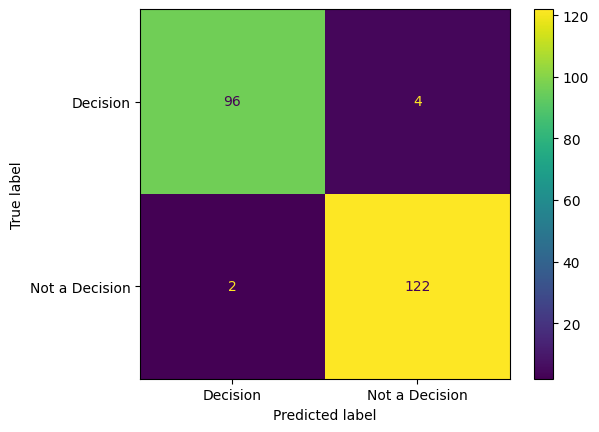

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

model_decision = load_model('bi_lstm_model_decision.h5')


X = df['message_preprocessed']
y = Y_d


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1, test_size=0.1)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(X_test)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)


# Making predictions
y_pred_prob = model_decision.predict(padded_sequences) ## change here !!!!!
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get binary predictions


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Decision','Not a Decision'])
disp.plot()
plt.savefig("confusion_matrix_decision.pdf",  format="pdf", bbox_inches='tight')

plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Displaying additional metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.97      0.98      0.98       124

    accuracy                           0.97       224
   macro avg       0.97      0.97      0.97       224
weighted avg       0.97      0.97      0.97       224



### Rationales

In [ ]:
# BI-LSTM on rationales
texts = df['message_preprocessed']
labels = Y_r
dataf = pd.DataFrame({'text': texts, 'label': labels})


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow import keras
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Define K-fold cross-validation
cv2 = KFold(n_splits=10, random_state=1, shuffle=True)


# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(dataf['text'])
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(dataf['text'])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

print('max_sequence_length', max_sequence_length)

# Model configuration
embedding_dim = 50
lstm_units = 50
dropout_rate = 0.2

# Model definition BI-LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=lstm_units)))
model.add(Dropout(dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define evaluation metrics lists
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Perform K-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(cv2.split(padded_sequences)):
        print(f"Training on fold {fold + 1}...")

        # Split the data
        x_train, x_val = padded_sequences[train_indices], padded_sequences[val_indices]
        y_train, y_val = dataf['label'].iloc[train_indices], dataf['label'].iloc[val_indices]

        # Train the model
        model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_val, y_val))

        # Evaluate the model on the validation set
        y_pred_prob = model.predict(x_val)
        y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get binary predictions

        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Append metrics to lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Fold {fold + 1} - Validation Accuracy: {accuracy}")
        print(f"Fold {fold + 1} - Validation Precision: {precision}")
        print(f"Fold {fold + 1} - Validation Recall: {recall}")
        print(f"Fold {fold + 1} - Validation F1 Score: {f1}")

# Calculate average metrics across all folds
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("\nAverage Metrics Across Folds:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")


model.save('bi_lstm_model_rationale.h5')

max_sequence_length 150
Training on fold 1...
Epoch 1/3
63/63 [==============================] - 10s 100ms/step - loss: 0.2427 - accuracy: 0.5622 - val_loss: 0.2315 - val_accuracy: 0.6384
Epoch 2/3
63/63 [==============================] - 3s 55ms/step - loss: 0.2148 - accuracy: 0.6697 - val_loss: 0.1924 - val_accuracy: 0.7232
Epoch 3/3
7/7 [==============================] - 1s 9ms/step
Fold 1 - Validation Accuracy: 0.7098214285714286
Fold 1 - Validation Precision: 0.7479674796747967
Fold 1 - Validation Recall: 0.7301587301587301
Fold 1 - Validation F1 Score: 0.7389558232931726
Training on fold 2...
Epoch 1/3
63/63 [==============================] - 2s 29ms/step - loss: 0.1420 - accuracy: 0.8095 - val_loss: 0.1353 - val_accuracy: 0.8214
Epoch 2/3
63/63 [==============================] - 1s 22ms/step - loss: 0.1238 - accuracy: 0.8388 - val_loss: 0.1466 - val_accuracy: 0.7812
Epoch 3/3
7/7 [==============================] - 0s 6ms/step
Fold 2 - Validation Accuracy: 0.7723214285714286
Fold

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### confusion matrix for rationales

7/7 [==============================] - 1s 9ms/step


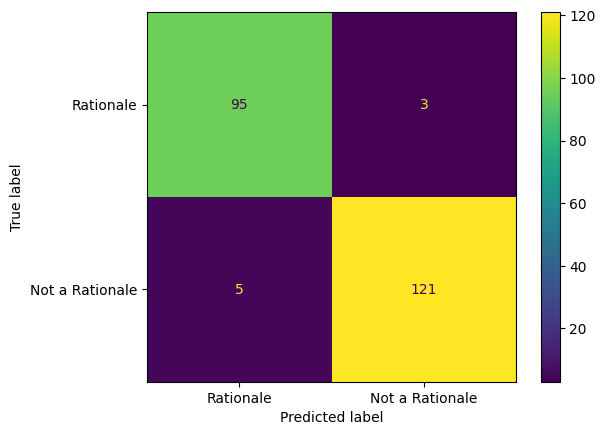

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


from keras.models import load_model

model_rationale = load_model('bi_lstm_model_rationale.h5') ## change here !!!!!


X = df['message_preprocessed']
y = Y_r

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1, test_size=0.1)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(X_test)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)


# Making predictions
y_pred_prob = model_rationale.predict(padded_sequences) ## change here !!!!!
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get binary predictions


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rationale','Not a Rationale'])
disp.plot()

plt.savefig("confusion_matrix_rationale.pdf",  format="pdf", bbox_inches='tight')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Displaying additional metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.98      0.96      0.97       126

    accuracy                           0.96       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.96      0.96      0.96       224

